<a href="https://colab.research.google.com/github/koukou10/numpy-100/blob/master/P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://www.dropbox.com/s/hzkncrahaa80vg0/data_P4.csv?dl=0

--2019-01-02 19:52:11--  https://www.dropbox.com/s/hzkncrahaa80vg0/data_P4.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hzkncrahaa80vg0/data_P4.csv [following]
--2019-01-02 19:52:11--  https://www.dropbox.com/s/raw/hzkncrahaa80vg0/data_P4.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6667086835c489c87c9b6e05a3.dl.dropboxusercontent.com/cd/0/inline/AYovgY8N1XkO530tPBPp7y39V2uGlMobOUvXciwH7LCsFGR3ARyUzAMc_3deicAuAlSwVE732JX8IDjEM7Ax8y1uHcP_tU2wLPJqfhqapX_L_S-93Zk9HBHOdzaTH8-PrZPqmhXtN-36u36_ElIRVeCrCjMVL8ZXGvxFqzn7zxPq0buqUv0LPPfnUmlCuXGhm5c/file [following]
--2019-01-02 19:52:11--  https://uc6667086835c489c87c9b6e05a3.dl.dropboxusercontent.com/cd/0/inline/AYovgY8N1XkO530tPBPp7y39V2uGlMobOUvXciwH7LCsFGR3A

In [0]:
%matplotlib inline

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")


data = pd.read_csv ("data_P4.csv?dl=0")
data.head(100)

,FL_NUM,DEP_DELAY,CANCELLED,DISTANCE,AA,AS,B6,DL,F9,HA,NK,EV,OO,UA,VX,WN,SIN_TIME,COS_TIME,NEW_DATE
0,43,-3.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.271476,-0.962445,735969
1,43,-4.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.276818,-0.960922,735970
2,43,-5.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.279487,-0.960150,735971
3,43,2.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.250023,-0.968240,735972
4,43,100.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,-0.171445,-0.985194,735973
5,43,7.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.231150,-0.972918,735974
6,43,-1.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.263446,-0.964674,735975
7,43,-5.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.279487,-0.960150,735976
8,43,-2.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.268801,-0.963196,735977
9,43,-4.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.276818,-0.960922,735978


In [0]:
# On classe les vols selon qu'ils soient en retard ou non 

data["DELAY_"] = 0
data["DELAY_"][np.where(data["DEP_DELAY"] > 0)[0]] = 1
data.head(10)

,FL_NUM,DEP_DELAY,CANCELLED,DISTANCE,AA,AS,B6,DL,F9,HA,NK,EV,OO,UA,VX,WN,SIN_TIME,COS_TIME,NEW_DATE,DELAY_
0,43,-3.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.271476,-0.962445,735969,0
1,43,-4.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.276818,-0.960922,735970,0
2,43,-5.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.279487,-0.960150,735971,0
3,43,2.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.250023,-0.968240,735972,1
4,43,100.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,-0.171445,-0.985194,735973,1
5,43,7.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.231150,-0.972918,735974,1
6,43,-1.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.263446,-0.964674,735975,0
7,43,-5.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.279487,-0.960150,735976,0
8,43,-2.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.268801,-0.963196,735977,0
9,43,-4.0,0,986,1,0,0,0,0,0,0,0,0,0,0,0,0.276818,-0.960922,735978,0


In [0]:
# On échantillonne notre base de données 

from sklearn.model_selection import train_test_split

X =  data.as_matrix(data.columns[[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  16, 17, 18]])
y = data.as_matrix([data.columns[1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['NEW_DATE'],
                                                    train_size=0.01, test_size=0.0025)

In [0]:
# On standardise les données pour la régression ridge

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [0]:
# On implémente une régression classique qui sera notre baseline

lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère  le rmse sur le jeu de données test comme baseline
baseline_rmse = np.sqrt(np.mean((lr.predict(X_test) - y_test) ** 2))

print('baseline_rmse = ', baseline_rmse)

baseline_rmse =  20.33707355557597


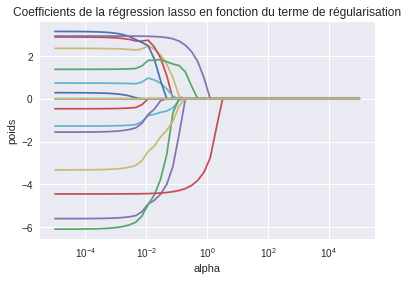

In [0]:
from sklearn.linear_model import Lasso

n_alphas = 50
alphas = np.logspace(-5, 5, n_alphas)

coefs = []
errors = []

lasso = Lasso()

for a in alphas:

    lasso.set_params(alpha=a)

    lasso.fit(X_train, y_train)

    coefs.append(lasso.coef_)

    errors.append( np.sqrt(np.mean((lasso.predict(X_test) - y_test) ** 2)))
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Coefficients de la régression lasso en fonction du terme de régularisation')
plt.axis('tight')
plt.show()


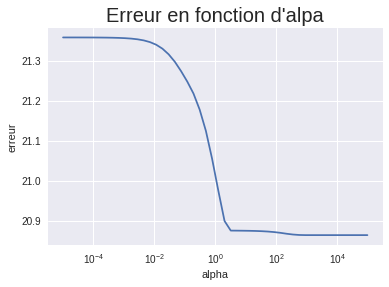

Le RMSE le plus faible est:  20.864045326776786


In [0]:
# RMSE en fonction de la valeur d'alpha (Regression Laso)

ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur')
plt.title("Erreur en fonction d'alpa", size=20)

plt.axis('tight')
plt.show()

print("Le RMSE le plus faible est: ", min(errors))

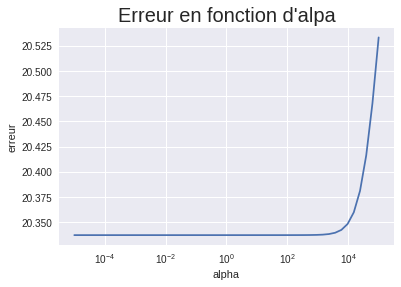

Le RMSE le plus faible est:  20.337073555576737


In [0]:
# RMSE en fonction de la valeur d'alpha (Regression Ridge)

from sklearn.linear_model import Ridge

n_alphas = 50
alphas = np.logspace(-5, 5, n_alphas)

coefs = []
errors = []

ridge = Ridge()

for a in alphas:

    ridge.set_params(alpha=a)

    ridge.fit(X_train_std, y_train)

    coefs.append(ridge.coef_)

    errors.append( np.sqrt(np.mean((ridge.predict(X_test_std) - y_test) ** 2)))
    

ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur')
plt.title("Erreur en fonction d'alpa", size=20)

plt.axis('tight')
plt.show()

print("Le RMSE le plus faible est: ", min(errors))

In [0]:
# On échantillonne notre base de données 

from sklearn.model_selection import train_test_split

X =  data.as_matrix(data.columns[[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  16, 17, 18]])

y = data.as_matrix([data.columns[19]])

X_delay_train, X_delay_test, y_delay_train, y_delay_test = train_test_split(
    X, y, train_size=0.15, test_size=0.05)


In [0]:
# Implémentation de la régression logistique

params = {'C': np.logspace(-3, 3, 7), 'penalty':['l1', 'l2']}
lr_gs = GridSearchCV(linear_model.LogisticRegression(), params, cv=5)
lr_gs.fit(X_delay_train, y_delay_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Création de la nouelle variable PRED_DELAY_OR_NOT qui représente les valeurs 
# prédites par la régression logistique sur la variable DELAY_

y_delay_pred = lr_gs.predict(X)
data['PRED_DELAY_OR_NOT'] = y_delay_pred
data.head(10)

,FL_NUM,DEP_DELAY,CANCELLED,DISTANCE,AA,AS,B6,DL,F9,HA,...,EV,OO,UA,VX,WN,SIN_TIME,COS_TIME,NEW_DATE,DELAY_,PRED_DELAY_OR_NOT
0,43,-3.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.271476,-0.962445,735969,0,0
1,43,-4.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.276818,-0.960922,735970,0,0
2,43,-5.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.279487,-0.960150,735971,0,0
3,43,2.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.250023,-0.968240,735972,1,0
4,43,100.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,-0.171445,-0.985194,735973,1,0
5,43,7.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.231150,-0.972918,735974,1,0
6,43,-1.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.263446,-0.964674,735975,0,0
7,43,-5.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.279487,-0.960150,735976,0,0
8,43,-2.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.268801,-0.963196,735977,0,0
9,43,-4.0,0,986,1,0,0,0,0,0,...,0,0,0,0,0,0.276818,-0.960922,735978,0,0


Matrice de confusion
[[0.91224269 0.08775731]
 [0.79077149 0.20922851]]


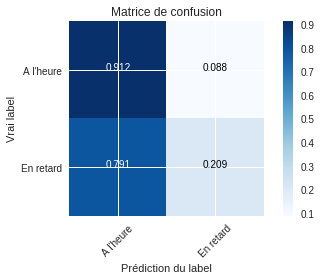

In [0]:
# Matrice de confusion pour la variable DELAY_

y_pred = lr_gs.predict(X_delay_test)


def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Matrice de confusion")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Vrai label')
    plt.xlabel('Prédiction du label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_delay_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=["A l'heure", "En retard"],
                      title='Matrice de confusion')

In [0]:
# Création du training set et du test set sans prendre en compte la variale PRED_DELAY_OR_NOT

from sklearn.model_selection import train_test_split

X =  data.as_matrix(data.columns[[0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]])
y = data.as_matrix([data.columns[1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['NEW_DATE'],
                                                    train_size=0.02, test_size=0.005)

In [0]:
# Standisation des données

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [0]:
# Les différentes valeurs d'alpha à tester
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)

In [0]:
# Regression Ridge sans la variable PRED_DELAY_OR_NOT

from sklearn.model_selection import GridSearchCV

ridge = GridSearchCV(linear_model.Ridge(), cv=5,
                     param_grid={"alpha": alphas}, scoring='neg_mean_squared_error')

ridge.fit(X_train_std, y_train)

# Afficher la valeur d'alpha optimale

print("Meilleur valeur d'alpha sur le jeu d'entraînement:",
      ridge.best_params_)
print('RMSE du modèle: ', np.sqrt(abs(ridge.score(X_train_std, y_train))))


Meilleur valeur d'alpha sur le jeu d'entraînement: {'alpha': 298.364724028334}
RMSE du modèle:  20.78355002297499


In [0]:
# Regression Lasso sans la variable PRED_DELAY_OR_NOT 

lasso = GridSearchCV(linear_model.Lasso(), cv=5,
                     param_grid={"alpha": alphas}, scoring='neg_mean_squared_error')

lasso.fit(X_train, y_train)

# Afficher la valeur d'alpha optimale
print("Meilleur valeur d'alpha sur le jeu d'entraînement:",
      lasso.best_params_)

print('RMSE du modèle: ', np.sqrt(abs(lasso.score(X_train, y_train))))

Meilleur valeur d'alpha sur le jeu d'entraînement: {'alpha': 1e-05}
RMSE du modèle:  20.7835498852049


In [0]:
# Regression ElasticNet sans la variable DELAY_

from sklearn.model_selection import GridSearchCV

elastic = GridSearchCV(linear_model.ElasticNet(), cv=5, param_grid={"alpha": alphas, 
                                                                    "l1_ratio": [0.2, 0.4, 0.6, 0.8, 1.0]},
                       scoring='neg_mean_squared_error')

elastic.fit(X_train, y_train)

# Afficher la valeur d'alpha optimale et de ratio de l1
print("Meilleur valeur d'alpha sur le jeu d'entraînement et l1 ratio:",
      elastic.best_params_)

print('RMSE du modèle: ', np.sqrt(abs(elastic.score(X_train, y_train))))


Meilleur valeur d'alpha sur le jeu d'entraînement et l1 ratio: {'alpha': 0.00025950242113997375, 'l1_ratio': 0.2}
RMSE du modèle:  20.863380722926014


In [0]:
# Création du training set et du test set, cette fois en prenant en compte 
# la variable PRED_DELAY_OR_NOT

from sklearn.model_selection import train_test_split

X =  data.as_matrix(data.columns[[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                  16, 17, 18, 19]])

y = data.as_matrix([data.columns[1]])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=data['NEW_DATE'], train_size=0.005, test_size=0.0016)


In [0]:
# Standardisation

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [0]:
# Regression Ridge avec la variable PRED_DELAY_OR_NOT

from sklearn.model_selection import GridSearchCV

ridge = GridSearchCV(linear_model.Ridge(), cv=5,
                     param_grid={"alpha": alphas}, scoring='neg_mean_squared_error')

ridge.fit(X_train_std, y_train)

# Afficher la valeur d'alpha optimale

print("Meilleur valeur d'alpha sur le jeu d'entraînement:",
      ridge.best_params_)
print('RMSE du modèle: ', np.sqrt(abs(ridge.score(X_train_std, y_train))))

# On a une meilleur RMSE avec la variable PRED_DELAY_OR_NOT que sans


Meilleur valeur d'alpha sur le jeu d'entraînement: {'alpha': 23.10129700083158}
RMSE du modèle:  16.375371214050535


In [0]:
# Regression Lasso avec la variable PRED_DELAY_OR_NOT

from sklearn.model_selection import GridSearchCV

lasso = GridSearchCV(linear_model.Lasso(), cv=5,
                     param_grid={"alpha": alphas}, scoring='neg_mean_squared_error')

lasso.fit(X_train, y_train)


# Afficher la valeur d'alpha optimal
print("Meilleur valeur d'alpha sur le jeu d'entraînement:",
      lasso.best_params_)

print('RMSE du modèle: ', np.sqrt(abs(lasso.score(X_train, y_train))))

# On a une meilleur RMSE avec la variable PRED_DELAY_OR_NOT que sans

Meilleur valeur d'alpha sur le jeu d'entraînement: {'alpha': 2.0092330025650458e-05}
RMSE du modèle:  16.633517534921943


In [0]:
# Regression ElasticNet avec la variable PRED_DELAY_OR_NOT

from sklearn.model_selection import GridSearchCV

elastic = GridSearchCV(linear_model.ElasticNet(), cv=5, param_grid={"alpha": alphas, 
                                                                    "l1_ratio": [0.2, 0.4, 0.6, 0.8, 1.0]},
                       scoring='neg_mean_squared_error')

elastic.fit(X_train, y_train)

# Afficher la valeur d'alpha optimale
print("Meilleur valeur d'alpha sur le jeu d'entraînement et l1 ratio:",
      elastic.best_params_)

print('RMSE du modèle: ', np.sqrt(abs(elastic.score(X_train, y_train))))

# On a une meilleur RMSE avec la variable PRED_DELAY_OR_NOT que sans

Meilleur valeur d'alpha sur le jeu d'entraînement et l1 ratio: {'alpha': 0.0042292428743894986, 'l1_ratio': 1.0}
RMSE du modèle:  16.648224862575926


In [0]:
# Regression ElasticNet en utilsant nested cross-validation

from sklearn.model_selection import cross_val_score
nested_score = cross_val_score(elastic, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

print('RMSE du modèle avec Nested Cross Validation: ', np.sqrt(abs(nested_score)).mean())

RMSE du modèle avec Nested Cross Validation:  16.7431916681515


In [0]:
# Regression ridge en utilsant nested cross-validation

from sklearn.model_selection import cross_val_score
nested_score = cross_val_score(ridge, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

print('RMSE du modèle avec Nested Cross Validation: ', np.sqrt(abs(nested_score)).mean())

RMSE du modèle avec Nested Cross Validation:  16.5431836812471


In [0]:
# Regression ridge en utilsant nested cross-validation
from sklearn.model_selection import cross_val_score
nested_score = cross_val_score(lasso, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

print('RMSE du modèle avec Nested Cross Validation: ', np.sqrt(abs(nested_score)).mean())

RMSE du modèle avec Nested Cross Validation:  16.56319145666604


In [0]:
# On implémente une régression classique qui sera notre baseline

lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère  le rmse sur le jeu de données test comme baseline
baseline_rmse = np.sqrt(np.mean((lr.predict(X_test) - y_test) ** 2))

print('baseline_rmse = ', round(baseline_rmse), "minutes")

baseline_rmse =  15.985 minutes


In [0]:
model_rmse = np.sqrt(np.mean((ridge.predict(X_test_std) - y_test) ** 2))
print("RMSE de notre modèle final ridge sur le jeu de données test: ", round(model_rmse, 3), "minutes"

RMSE de notre modèle final ridge sur le jeu de données test:  15.979 minutes


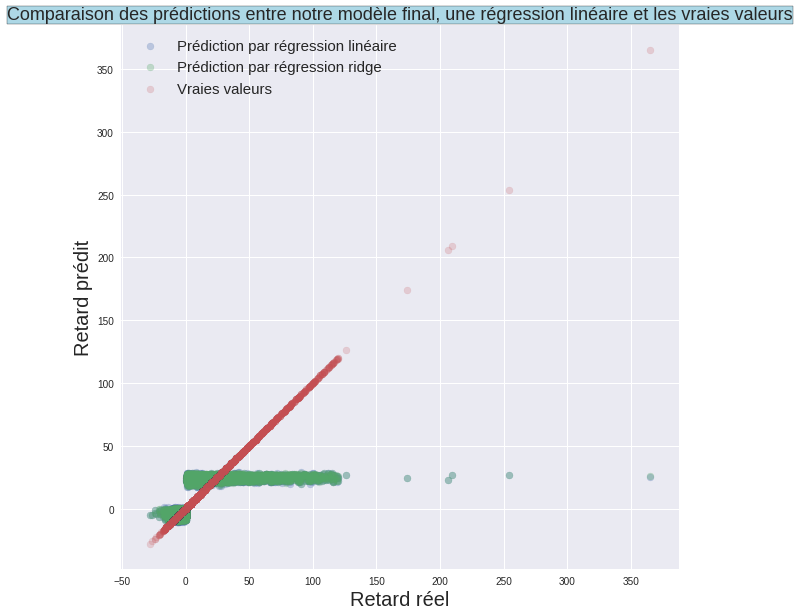

In [0]:
# Visualisation des prédiction de retard

plt.figure(figsize=(10,10))

plt.title("Comparaison des prédictions entre notre modèle final, une régression"
          " linéaire et les vraies valeurs", 
          bbox={"pad":0.5, "facecolor":'lightblue'}, size=18)
plt.scatter(y_test, lr.predict(X_test), alpha=0.3)
plt.scatter(y_test, ridge.predict(X_test_std), alpha=0.3)
plt.scatter(y_test, y_test, alpha=0.2)
plt.ylabel("Retard prédit", size=20)
plt.xlabel("Retard réel", size=20)
plt.legend(["Prédiction par régression linéaire", "Prédiction par régression ridge",
            "Vraies valeurs"], fontsize=15)
plt.show()

In [0]:
data["PREDICTED_DELAY"] = ridge.predict(std_scale.transform(X))

In [0]:
from google.colab import drive
drive.mount('drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
data.to_csv("final_dataset_P4.csv",encoding='utf-8', index=False)
!cp final_dataset_P4.csv drive/My\ Drive/